# Getting CO2 data from a website in JSON format
The website is in JSON with day, month, year, CO2 level and CO2 trend. It is the global average CO2 since 2013. The data is visualized in a graph below with x-axis of date and y-axis of CO2. There is a download sample option that is commented out that will add a few entries to a csv. The download all option downloads everything and puts it into a csv with date in the first column and co2 level (PPM) in the second

In [ ]:
import pip

package_names=['bs4','requests', 'pandas', 'datetime', 'matplotlib'] #packages to install
pip.main(['install'] + package_names + ['--upgrade'])


In [8]:
import requests
import datetime

#using api to collect co2 data by day since 2013
url = f'https://global-warming.org/api/co2-api'
r = requests.get(url)
j = r.json()
#load in the data
data = j.get('co2')

#data is dictionaries in a list
#[{day},{day}]
#each entry is a different day
data_points = []
csv_file = open('co2.csv', 'w')
sample_csv_file = open('co2_sample.csv', 'w')
def download_all():
    csv_file.write("date")
    csv_file.write(",")
    csv_file.write("co2")
    csv_file.write("\n")
    for entry in data:
        try:
            year = int(entry.get('year'))
            month = int(entry.get('month'))
            day = int(entry.get('day'))
            co2 = float(entry.get('trend'))
            #create datetime object
            dt = datetime.datetime(year, month, day)
            date = str(dt)
            daily_data = (dt, co2)
            data_points.append(daily_data)

            #write to the csv
            csv_file.write(date)
            csv_file.write(',')
            csv_file.write(str(co2))
            csv_file.write("\n")
        except:
            continue

def download_sample():
    count = 0
    for entry in data:
        
        if count == 5:
            break
        try:
            year = int(entry.get('year'))
            month = int(entry.get('month'))
            day = int(entry.get('day'))
            co2 = float(entry.get('trend'))
            #create datetime object
            dt = datetime.datetime(year, month, day)
            date = str(dt)
            daily_data = (dt, co2)
            data_points.append(daily_data)

            #write to the csv
            sample_csv_file.write(date)
            sample_csv_file.write(',')
            sample_csv_file.write(str(co2))
            sample_csv_file.write("\n")
        except:
            print('ok')
            continue
        count += 1

#download_all downloads everything and download_sample downloads a few entries
download_all()
# download_sample()

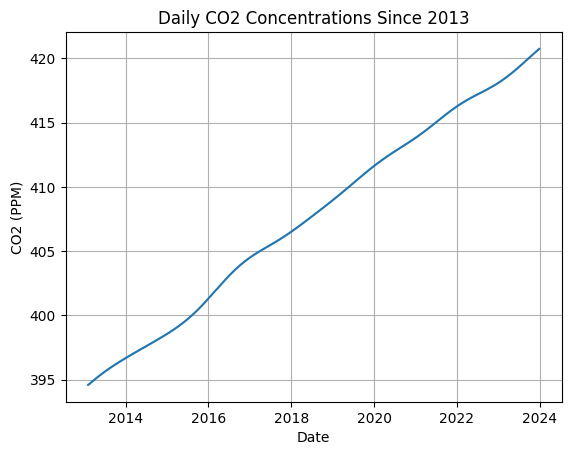

In [7]:
import matplotlib.pyplot as plt

x_values = []
y_values = []

for entry in data_points:
    x, y = entry
    #making sure there is a pair for everything
    if x is not None and y is not None:
        x_values.append(x)
        y_values.append(y)

fig, ax = plt.subplots()

# Plot the data
ax.plot(x_values, y_values)

#set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('CO2 (PPM)')
ax.set_title('Daily CO2 Concentrations Since 2013')
plt.grid(True)
# Show the plot
plt.show()


# API Extraction From NOAA to get global average temperature
This section gets average temperature data from NOAA using certain dates. The first date of each month is used and then looped through each month and each year to get all the points. 1000 entries are used per day to attempt to get a global average temperature.

In [116]:
#import statemetnts
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime
import csv


#my noaa api token
Token = 'PPATArdIdWUDZnJIwyLBkVMyNtEZcxmd'

temps = []
temp_dict = {}
daily_averages = {}
daily_temperatures = {}
yearly_averages_list = []

def download_temps():
   
    for year in range(2013, 2024):
        year = str(year)
        yearly_total = 0
        yearly_count = 0
        for month in range(1,12):
            yearly_count += 1
            try:
                if month < 10:
                    #the numbers have to have a 0 in front to work properly
                    month = str(month)
                    month = '0'+month
                else:
                    month = str(month)
                
                #using global historical climatorlogy network dataset
                #average temperature, metric units, limited to 100 per query
                #for each year taking the temperature for the first of the month from 100 random locations
                r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&units=metric&limit=1000&startdate='+year+'-'+month+'-01&enddate='+year+'-'+month+'-31', headers={'token':Token})
                d = json.loads(r.text)
            except:
                continue
        #note: only showing the first of every year
        #can try to do first of every month. So we will get the average global temp of the first of every month

            try:
                #using the response from the request get the data from the dictionaries
                for record in d['results']:
                    #create datetime object
                    date = datetime.strptime(record['date'], '%Y-%m-%dT%H:%M:%S').date()
                    temperature = record['value']
                    temps.append(temperature)
                    #if the date already exists we add a value to our dictionary
                    #the final format is one day and 1000 temperature values
                    if date in daily_temperatures:
                        daily_temperatures[date].append(temperature)
                    else:
                        daily_temperatures[date] = [temperature]
                #get the average daily temperature as well
                for date, temperatures in daily_temperatures.items():
                    daily_averages[date] = round(sum(temperatures) / len(temperatures), 3)
            except:
                continue
            #getting the monthly average humidity and adding tuples to a list
            yearly_total += round(sum(temperatures) / len(temperatures), 3) 

        #getting the yearly average global temperatures and adding tuple of date and temp average to a list
        #the date is the first of every year
        yearly_average = round(yearly_total/yearly_count, 2)
        year = int(year)
        date = datetime(year = year, month=1, day= 1).date()
        yearly_vals = date, yearly_average
        yearly_averages_list.append(yearly_vals)   
    
def download_sample_temp():
    temp_sample = open('temp_sample.csv', 'w')
    daily_temperatures = {}
    for year in range(1):
        year = 2013
        year = str(year)
        for month in range(1,5):
            try:
                if month < 10:
                    #the numbers have to have a 0 in front to work properly
                    month = str(month)
                    month = '0'+month
                else:
                    month = str(month)
                
                #using global historical climatorlogy network dataset
                #average temperature, metric units, limited to 1 per query
                #for each year taking the temperature for the first of the month from 100 random locations
                r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&units=metric&limit=1&startdate='+year+'-'+month+'-01&enddate='+year+'-'+month+'-31', headers={'token':Token})
                d = json.loads(r.text)

            except:
                continue
        #note: only showing the first of every year
        #can try to do first of every month. So we will get the average global temp of the first of every month
    
            
            try:
                for record in d['results']:
                    date = datetime.strptime(record['date'], '%Y-%m-%dT%H:%M:%S').date()
                    temperature = record['value']
                    temps.append(temperature)
                    temp_sample.write(str(date))
                    temp_sample.write(',')
                    temp_sample.write(str(temperature))
                    temp_sample.write("\n")
                    if date in daily_temperatures:
                        daily_temperatures[date].append(temperature)
                    else:
                        daily_temperatures[date] = [temperature]
                for date, temperatures in daily_temperatures.items():
                    daily_averages[date] = round(sum(temperatures) / len(temperatures), 3)
            except:
                continue
download_temps()
#download_sample_temp()


In [205]:
#prints yearly averages
print(yearly_averages_list)

[(datetime.datetime(2013, 1, 1, 0, 0), 45.032682612186285), (datetime.datetime(2014, 1, 1, 0, 0), 45.89028910256673), (datetime.datetime(2015, 1, 1, 0, 0), 48.43677267059136), (datetime.datetime(2016, 1, 1, 0, 0), 44.339899528970925), (datetime.datetime(2017, 1, 1, 0, 0), 45.39010900659512), (datetime.datetime(2018, 1, 1, 0, 0), 44.25923869593051), (datetime.datetime(2019, 1, 1, 0, 0), 48.05651923648247), (datetime.datetime(2020, 1, 1, 0, 0), 45.34938165454353), (datetime.datetime(2021, 1, 1, 0, 0), 50.56750315656566), (datetime.datetime(2022, 1, 1, 0, 0), 48.652409202317294), (datetime.datetime(2023, 1, 1, 0, 0), 39.90571338383838)]


In [120]:
#writing to csv with yearly averages for global temperatures
csv_file = open('global_temp_yearly.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("temp")
csv_file.write("\n")
for date, temp in yearly_averages_list:
    try:
        date = str(date)
        temp = str(temp)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(temp)
    csv_file.write("\n")

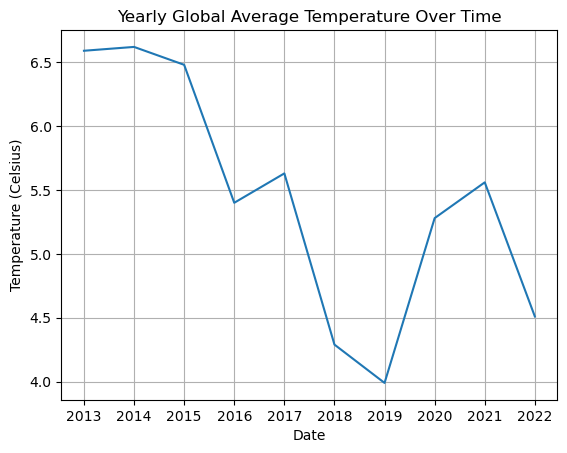

In [126]:
#creating graph for estes temp yearly
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df_yearly_global_average_temps = pd.read_csv('global_temp_yearly.csv')
#not including 2023 because it only has the first five months
#heavily skewed lower because the months are winter and beginning of spring
df_yearly_global_average_temps = df_yearly_global_average_temps[:-1]
# Create a line plot of the data
plt.plot(df_yearly_global_average_temps['date'], df_yearly_global_average_temps['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Yearly Global Average Temperature Over Time')
#every year is 1 tick
#used trial and error because the date is in datetime format, which is too large to fit on x axis
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_tick_labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.xticks(x_ticks, x_tick_labels)
plt.grid(True)
# plt.xticks()
plt.show()

In [31]:
#create csv file of the average daily temperatures
avg_temp_global = open('avg_temps_global.csv', 'w')
avg_temp_global.write('date')
avg_temp_global.write(',')
avg_temp_global.write('temp')
avg_temp_global.write('\n')
for k, v in daily_averages.items():
    k = str(k)
    v = str(v)
    avg_temp_global.write(k)
    avg_temp_global.write(',')
    avg_temp_global.write(v)
    avg_temp_global.write('\n')

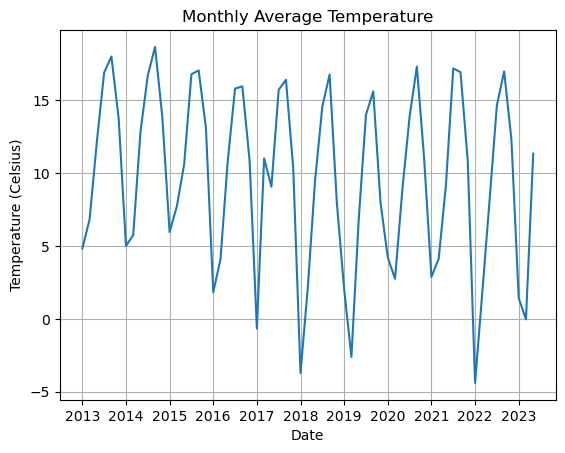

In [36]:
#create graph of monthly average temperatures
import pandas as pd
import matplotlib.pyplot as plt
df_temp_global_average = pd.read_csv('avg_temps_global.csv')

plt.plot(df_temp_global_average['date'], df_temp_global_average['temp'])
plt.grid(True)
#set labels and title
plt.xlabel('Date')
plt.ylabel("Temperature (Celsius)")
plt.title('Monthly Average Temperature')
#had to set the x ticks because it was showing the full date object
x_ticks = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
x_tick_labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.xticks(x_ticks, x_tick_labels)
plt.show()


In [19]:
#create csv for the daily global temperatures
#this csv has one date and 1000 columns of data per row
with open('temps.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['date', 'temp'])
    for key, value in daily_temperatures.items():
                row = [key] + value
                # writer.writerow(key, value + "\n")
                writer.writerow(row)

Was initially going to try and get average global temperature by using specific locations from northern and southern hemisphere that would average out to global average, but most of the ones I chose did not have any data available.

In [24]:
#print(daily_averages)
total = float()
count = int()
for temp in daily_averages.values():
    count+=1
    total += temp
print("Average global temp:")
print(total/count)
#using all of the stations is not accurate
#going to use 10 locations
#GHCND:ASN00064018 - Alice Springs Airport, Australia
# GHCND:CA002303984 - Edmonton Municipal Airport, Canada
# GHCND:RSM00022641 - Moscow Observatory, Russia
# GHCND:ITE00100550 - De Bilt, Netherlands
# GHCND:USC00042319 - Dugway Proving Ground, Utah, United States
# GHCND:MXM00076680 - Ciudad Victoria, Mexico
# GHCND:ASN00094185 - Cairns Aero, Australia
# GHCND:CA006158350 - Toronto Buttonville Municipal Airport, Canada
# GHCND:RSM00030710 - Samara, Russia
# GHCND:USC00026153 - Bishop, California, United States

Average global temp:
9.692587301587299


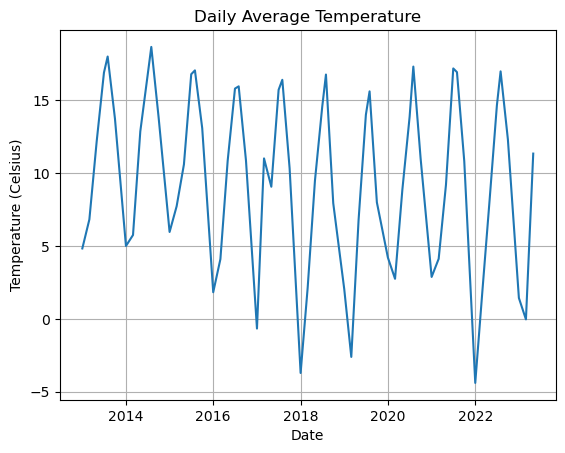

In [25]:
#graph of daily average temperature
import pandas as pd
df_temp = pd.DataFrame.from_dict(daily_averages, orient='index', columns=['avgTemp'])
import matplotlib.pyplot as plt

# plot the data
plt.plot(df_temp.index, df_temp['avgTemp'])
plt.grid(True)
#set labels and title
plt.xlabel('Date')
plt.ylabel("Temperature (Celsius)")
plt.title('Daily Average Temperature')
plt.show()


# Some descriptive statistics below

In [23]:
#descriptive stats
df_temp.describe()

,avgTemp
count,58.000000
mean,9.983397
std,6.097115
min,-4.399000
25%,5.245250
50%,10.848000
75%,15.702500
max,18.675000


In [3]:

import pandas as pd
df_globaltemp = pd.read_csv('temps.csv')
df_globaltemp['temp'].describe()


count    58.000000
mean      7.927586
std      15.733970
min     -28.200000
25%       0.500000
50%      12.450000
75%      21.050000
max      34.400000
Name: temp, dtype: float64

In [21]:
#getting temperature data from Estes Park
#this along with the humidity code could have been combined with only about 5 extra lines, but I did not think about this until after I finished
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime
import regex
#url= 'https://www.estesparkweather.net/archive_reports.php?date=202005'


df_list = []
index = []

date_list = []
temp_list = []
data_values = []
monthly_averages_list = []
yearly_averages_list = []
#for loops to go through each month from 2013 to 2022
base_url= 'https://www.estesparkweather.net/archive_reports.php?date='
for year in range(2013, 2024):
    year = str(year)
    yearly_total = 0
    yearly_count = 0

        
    for month in range(1, 13):
        #calculating monthly averages
        yearly_count += 1
        monthly_total = 0
        monthly_count = 0
        
        #website defulats to may if the month or year goes too far, so we will break out before then
        if year == '2023' and month == 6:
            break
        if month < 10:
            month = str(month)
            month = '0' + month
        month = str(month)

        url = base_url + year + month
        page = requests.get(url)
        soup =  BeautifulSoup(page.content,'html.parser')
        #retreive the tables for each day of the month
        table = soup.find_all('table', {'cellpadding': '3'})




        for day in table:
            # try:
            monthly_count += 1
            avg_temp = day.find_all('tr')
            days = str(avg_temp[0].text.strip())
            days = (regex.findall(r'(\d{1,2})\s[average|Average]', days))
            #average temperature for that month
            try:
                temp = str(avg_temp[1].text.strip())
            
                temp = (regex.findall(r'(\d{1,2}\.\d).[Ff]', temp))
                # temp = (regex.findall(r'(\d{1,2})\%', temp))
            except:
                continue
            try:
                date = datetime.datetime(int(year), int(month), int(days[0]))
                date = str(date)
            except:
                #some of the values from the table are monthly averages or something else, that we don't want to include
                #the regex will be empty and try box will fail, we will skip the value
                continue
            try:
                temp = float(temp[0])
                #convert to celsius
                temp = round((temp-32) * (5.0/9.0), 2)
                monthly_total += temp
                vals = date, temp
                if date is not None and temp is not None:
                    data_values.append(vals)
            except:
                continue
            #add values to lists
            date_list.append(date)
            temp_list.append(temp)
            
        #getting the monthly average humidity and adding tuples to a list
        #the date is the first of every month
        monthly_average = round(monthly_total/monthly_count, 2)
        yearly_total += monthly_average
        date = datetime.datetime(int(year), int(month), 1)
        month_vals = date, monthly_average
        monthly_averages_list.append(month_vals)

    #getting the yearly average humidity and adding tuple of date and humidity average to a list
    #the date is the first of every year
    yearly_average = round(yearly_total/yearly_count, 2)
    date = datetime.datetime(int(year), 1, 1)
    yearly_vals = date, yearly_average
    yearly_averages_list.append(yearly_vals)
            #day: 1-31
            #temp: xx.x
            # print(avg_temp[1].text)
            # except:
            #     continue

In [98]:
#writing to csv with monthly averages
csv_file = open('estes_temp_monthly.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("temp")
csv_file.write("\n")
for date, temp in monthly_averages_list:
    try:
        date = str(date)
        temp = str(temp)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(temp)
    csv_file.write("\n")

In [106]:
#writing to csv with yearly averages
csv_file = open('estes_temp_yearly.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("temp")
csv_file.write("\n")
for date, temp in yearly_averages_list:
    try:
        date = str(date)
        temp = str(temp)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(temp)
    csv_file.write("\n")

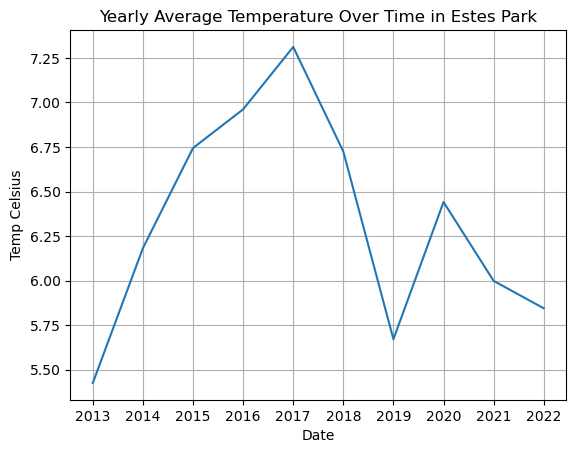

In [158]:
#creating graph for estes temp yearly
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df_yearly_temp_estes = pd.read_csv('estes_temp_yearly.csv')
#not including 2023 because it only has the first five months
#heavily skewed lower because the months are winter and beginning of spring
df_yearly_temp_estes = df_yearly_temp_estes[:-1]
# Create a line plot of the data
plt.plot(df_yearly_temp_estes['date'], df_yearly_temp_estes['temp'])
plt.xlabel('Date')
plt.ylabel('Temp Celsius')
plt.title('Yearly Average Temperature Over Time in Estes Park')
#every year is 12 ticks
#used trial and error because the date is in datetime format, which is too large to fit on x axis
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_tick_labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.xticks(x_ticks, x_tick_labels)
# plt.xticks()
plt.grid(True)
plt.show()

In [17]:
#writing to csv for estes park, CO temperature
csv_file = open('estes_temp.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("temp")
csv_file.write("\n")
for date, temp in data_values:
    try:
        date = str(date)
        temp = str(temp)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(temp)
    csv_file.write("\n")

In [135]:
#getting humidity data from Estes Park
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime
import regex
#url= 'https://www.estesparkweather.net/archive_reports.php?date=202005'


df_list = []
index = []

date_list = []
humidity_list = []
data_values = []
monthly_averages_list = []
yearly_averages_list = []
#for loops to go through each month from 2013 to 2022
base_url= 'https://www.estesparkweather.net/archive_reports.php?date='

for year in range(2013, 2024):
    year = str(year)
    yearly_total = 0
    yearly_count = 0
    for month in range(1, 13):
        #calculating monthly averages
        yearly_count += 1
        monthly_total = 0
        monthly_count = 0
        
        if year == '2023' and month == 6:
            break
        if month < 10:
            month = str(month)
            month = '0' + month
        month = str(month)

        url = base_url + year + month
        page = requests.get(url)
        soup =  BeautifulSoup(page.content,'html.parser')
        #retreive the tables for each day of the month
        table = soup.find_all('table', {'cellpadding': '3'})




        for day in table:
            monthly_count += 1
            # try:
            avg_temp = day.find_all('tr')
            days = str(avg_temp[0].text.strip())
            days = (regex.findall(r'(\d{1,2})\s[average|Average]', days))
            #average temperature for that month
            try:
                humidity = str(avg_temp[2].text.strip())
            
                # temp = (regex.findall(r'(\d{1,2}\.\d).[Ff]', temp))
                humidity = (regex.findall(r'(\d{1,2})\%', humidity))
            except:
                continue
            try:
                date = datetime.datetime(int(year), int(month), int(days[0]))
            except:
                #some of the values from the table are monthly averages or something else, that we don't want to include
                #the regex will be empty and try box will fail, we will skip the value
                continue
            try:
                # temp = float(temp[0])
                # #convert to celsius
                # temp = round((temp-32) * (5.0/9.0), 2)
                monthly_total += float(humidity[0])

                vals = date, humidity[0]
                if date is not None and humidity is not None:
                    data_values.append(vals)
            except:
                continue
            #add values to lists
            date_list.append(date)
            humidity_list.append(humidity)
        
        #getting the monthly average humidity and adding tuples to a list
        #the date is the first of every month
        monthly_average = monthly_total/monthly_count
        yearly_total += monthly_average
        date = datetime.datetime(int(year), int(month), 1)
        month_vals = date, monthly_average
        monthly_averages_list.append(month_vals)

    #getting the yearly average humidity and adding tuple of date and humidity average to a list
    #the date is the first of every year
    yearly_average = yearly_total/yearly_count
    date = datetime.datetime(int(year), 1, 1)
    yearly_vals = date, yearly_average
    yearly_averages_list.append(yearly_vals)
            #day: 1-31
            #temp: xx.x
            # print(avg_temp[1].text)
            # except:
            #     continue

In [136]:
#writing to csv with monthly averages
csv_file = open('estes_humidity_monthly.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("humidity")
csv_file.write("\n")
for date, humidity in monthly_averages_list:
    try:
        date = str(date)
        humidity = str(humidity)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(humidity)
    csv_file.write("\n")

In [137]:
#writing to csv with yearly averages
csv_file = open('estes_humidity_yearly.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("humidity")
csv_file.write("\n")
for date, humidity in yearly_averages_list:
    try:
        date = str(date)
        humidity = str(humidity)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(humidity)
    csv_file.write("\n")

In [138]:
#writing to csv for estes park, CO Humidity
csv_file = open('estes_humidity.csv', 'w')
csv_file.write("date")
csv_file.write(",")
csv_file.write("humidity")
csv_file.write("\n")
for date, humidity in data_values:
    try:
        date = str(date)
        humidity = str(humidity)
    except:
        continue
    csv_file.write(date)
    csv_file.write(',')
    csv_file.write(humidity)
    csv_file.write("\n")

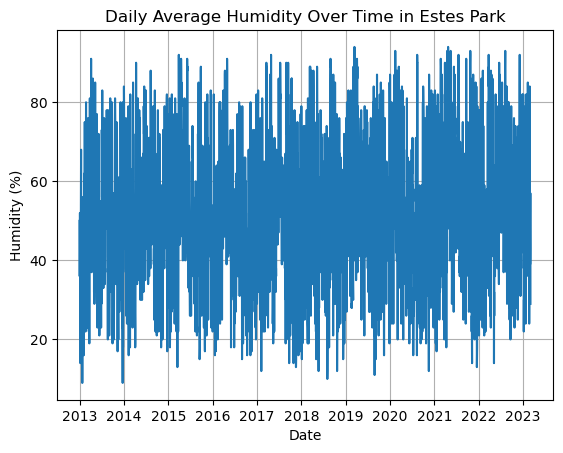

In [155]:
#creating graph for estes humidity daily
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df_humidity_estes_daily = pd.read_csv('estes_humidity.csv')

# Create a line plot of the data
plt.plot(df_humidity_estes_daily['date'], df_humidity_estes_daily['humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Daily Average Humidity Over Time in Estes Park')
#every year is 12 ticks
#used trial and error because the date is in datetime format, which is too large to fit on x axis
# x_ticks = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
x_ticks = [0, 350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3150, 3500]
x_tick_labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.xticks(x_ticks, x_tick_labels)

# plt.xticks(x_ticks)
plt.grid(True)
plt.show()

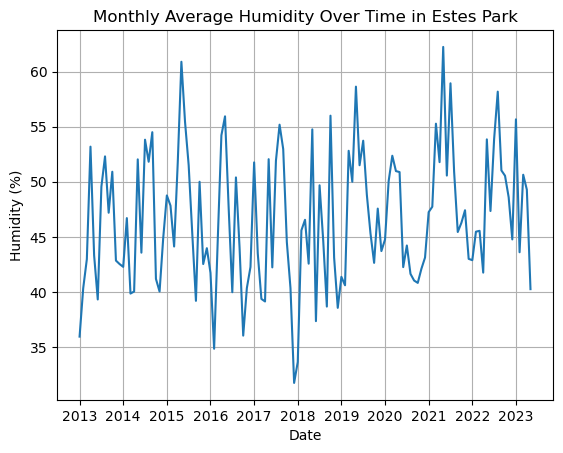

In [139]:
#creating graph for estes humidity
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('estes_humidity_monthly.csv')

# Create a line plot of the data
plt.plot(df['date'], df['humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Monthly Average Humidity Over Time in Estes Park')
#every year is 12 ticks
#used trial and error because the date is in datetime format, which is too large to fit on x axis
x_ticks = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
x_tick_labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.xticks(x_ticks, x_tick_labels)
plt.grid(True)
plt.show()

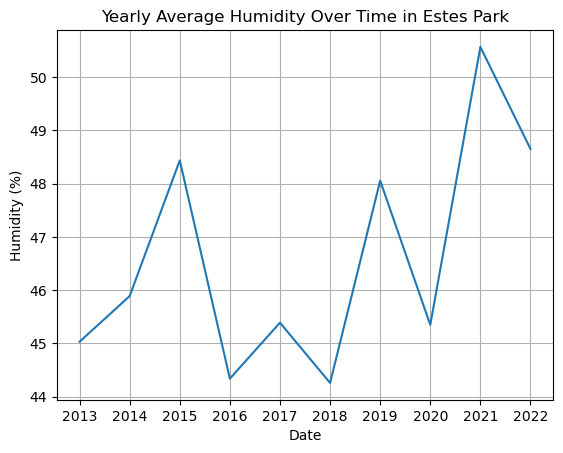

In [156]:
#creating graph for estes humidity
import pandas as pd
import matplotlib.pyplot as plt

#create dataframe
df_yearly_humidity_estes = pd.read_csv('estes_humidity_yearly.csv')
df_yearly_humidity_estes = df_yearly_humidity_estes[:-1]
# Create a line plot of the data
plt.plot(df_yearly_humidity_estes['date'], df_yearly_humidity_estes['humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Yearly Average Humidity Over Time in Estes Park')
#every year is 12 ticks
#used trial and error because the date is in datetime format, which is too large to fit on x axis
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_tick_labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.xticks(x_ticks, x_tick_labels)
plt.grid(True)
plt.show()

In [157]:
import pandas as pd
df_co2 = pd.read_csv('co2.csv')
df_co2['co2'].describe()


count    3759.000000
mean      406.912426
std         7.277117
min       394.420000
25%       400.075000
50%       406.970000
75%       413.330000
max       418.820000
Name: co2, dtype: float64

In [195]:
df_estes_daily = pd.read_csv('estes_temp.csv')
df_estes_daily['temp'].describe()

count    3632.000000
mean        6.579328
std         8.605387
min       -17.720000
25%         0.280000
50%         6.780000
75%        14.110000
max        24.610000
Name: temp, dtype: float64

In [9]:
#did a t-test but was not necessary
#co2 is around 400 and temp is around 15, so the means are obviously very far apart.
from scipy.stats import ttest_ind
#T-test between estes and the co2
ttest_ind(df['co2'], df2['temp'])

Ttest_indResult(statistic=1151.1847831896423, pvalue=0.0)

Correlation: -0.66


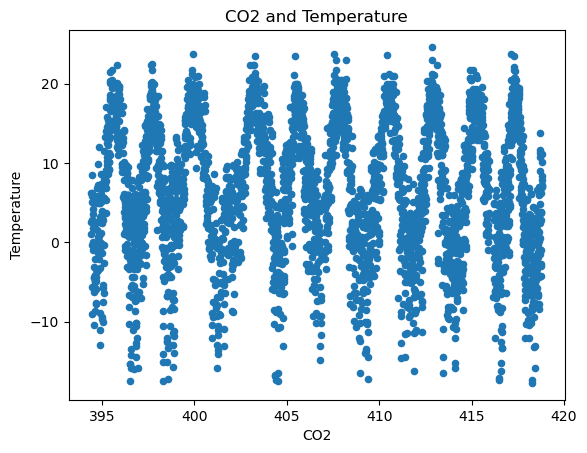

In [197]:
#co2 and daily temperature for estes park
import pandas as pd
#create pandas datetime object
df_co2['date'] = pd.to_datetime(df_co2['date'])
df_estes_daily['date'] = pd.to_datetime(df_estes_daily['date'])

#merge with date
merged_df = pd.merge(df_co2, df_estes_daily, on = 'date')
merged_df.plot.scatter(x='co2', y='temp')
plt.title('CO2 and Temperature')
plt.xlabel('CO2')
plt.ylabel('Temperature')
# plt.xlim(300, 500)
# plt.ylim(0, 30)
correlation = merged_df['co2'].corr(merged_df['temp'])
print(f"Correlation: {corr:.2f}")
plt.show()


In [40]:

#This kernel organizes into monthlly averages for Estes Park 
from collections import defaultdict
temp_by_month = defaultdict(list)

for date, temp in data_values:
    # extract year and month from the date object
    year = date.year
    month = date.month

    # add the temperature to the corresponding month in the defaultdict
    temp_by_month[(year, month)].append(temp)

# calculate the average temperature for each month
avg_temp_by_month = {}
for year_month, temps in temp_by_month.items():
    year, month = year_month
    avg_temp = round(sum(temps) / len(temps), 2)
    date = datetime.date(year, month, 1)
    avg_temp_by_month[date] = avg_temp



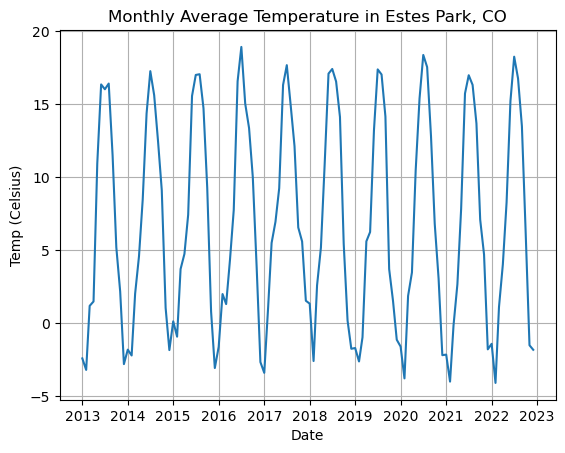

In [44]:
#plot data of monthly average temperature for estes park
import pandas as pd
df_temp = pd.DataFrame.from_dict(avg_temp_by_month, orient='index', columns=['avg_temp'])
import matplotlib.pyplot as plt

# plot the data
plt.plot(df_temp.index, df_temp['avg_temp'])
plt.grid(True)
# set the x-axis label and title
plt.xlabel('Date')
plt.ylabel('Temp (Celsius)')
plt.title('Monthly Average Temperature in Estes Park, CO')

# show the plot
plt.show()


In [14]:
#combining the datasets with date as the first column
import pandas as pd
import pandas as pd

# Read the first CSV file into a Pandas DataFrame
df_co2 = pd.read_csv('co2.csv', parse_dates=['date'])

# Read the second CSV file into a Pandas DataFrame
df_humidity = pd.read_csv('estes_humidity.csv', parse_dates=['date'])

df_estes_temp = pd.read_csv('estes_temp.csv', parse_dates=['date'])

df_global_temp = pd.read_csv('avg_temps_global.csv', parse_dates=['date'])

# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(df_co2, df_humidity, on='date')

#rename columns
merged_df.columns = ['date', 'co2', 'humidity']

# Write the merged DataFrame to a new CSV file
merged_df.to_csv('merged.csv', index=False)

merged_df = pd.merge(merged_df, df_estes_temp, on = 'date')

merged_df.columns = ['date', 'co2', 'humidity', 'temp']
merged_df.to_csv('merged.csv', index = False)

merged_df = pd.merge(merged_df, df_global_temp, on = 'date', how = 'left')

merged_df.columns = ['date', 'co2', 'humidity', 'temp', 'global_temp']
merged_df.to_csv('merged.csv', index = False)


In [169]:
#same thing as earlier except using yearly averages
import pandas as pd

df_yearly_humidity_estes = pd.read_csv('estes_humidity_yearly.csv', parse_dates=['date'])
df_co2 = pd.read_csv('co2.csv', parse_dates = ['date'])
df_yearly_temp_estes = pd.read_csv('estes_temp_yearly.csv', parse_dates = ['date'])
df_yearly_global_temp = pd.read_csv('global_temp_yearly.csv', parse_dates = ['date'])

#left merge to have the dates from the yearly humidity
merged_df_yearly = pd.merge(df_yearly_humidity_estes, df_co2, on = 'date', how = 'left')
merged_df_yearly.columns = ['date', 'humidity', 'co2']
merged_df_yearly.to_csv('merged_yearly.csv', index = False)
merged_df_yearly = pd.merge(merged_df_yearly, df_yearly_temp_estes, on = 'date', how = 'left')
merged_df_yearly.columns = ['date', 'humidity', 'co2', 'temp_estes']
merged_df_yearly.to_csv('merged_yearly.csv', index = False)
merged_df_yearly = pd.merge(merged_df_yearly, df_yearly_global_temp, on = 'date', how = 'left')
merged_df_yearly.columns = ['date', 'humidity', 'co2', 'temp_estes', 'global']
merged_df_yearly.to_csv('merged_yearly.csv', index = False)


Correlation: 0.44


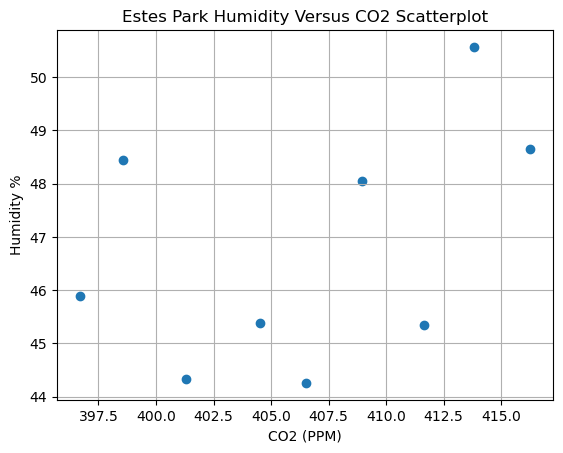

In [204]:
#scatterplot and correlation between co2 and humidity in estes park
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file as a DataFrame
df_yearly_final = pd.read_csv('merged_yearly.csv', parse_dates=[0])
df_yearly_final = df_yearly_final.iloc[:-1, :]
# Create the scatter plot
plt.figure()
plt.scatter(df_yearly_final.iloc[:, 2], df_yearly_final.iloc[:, 1])
plt.xlabel('CO2 (PPM)')
plt.ylabel('Humidity %')
plt.title('Estes Park Humidity Versus CO2 Scatterplot')
corr = df_yearly_final.iloc[:, 1].corr(df_yearly_final.iloc[:, 2])
print(f"Correlation: {corr:.2f}")
plt.grid(True)
plt.show()


Correlation: -0.51


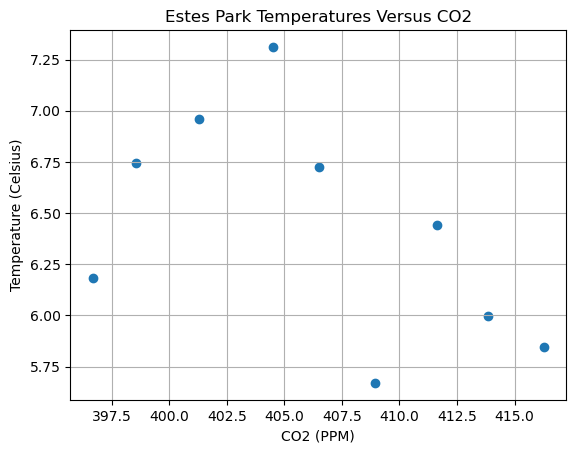

In [201]:
#scatterplot and correlation between co2 and temp in estes park
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file as a DataFrame
df_yearly_final = pd.read_csv('merged_yearly.csv', parse_dates=[0])
#ignore the 2023 value
df_yearly_final = df_yearly_final.iloc[:-1, :]
# Create the scatter plot
plt.figure()
plt.scatter(df_yearly_final.iloc[:, 2], df_yearly_final.iloc[:, 3])
plt.xlabel('CO2 (PPM)')
plt.ylabel('Temperature (Celsius)')
plt.title('Estes Park Temperatures Versus CO2')
corr = df_yearly_final.iloc[:, 2].corr(df_yearly_final.iloc[:, 3])
print(f"Correlation: {corr:.2f}")
plt.grid(True)
plt.show()


Correlation: -0.66


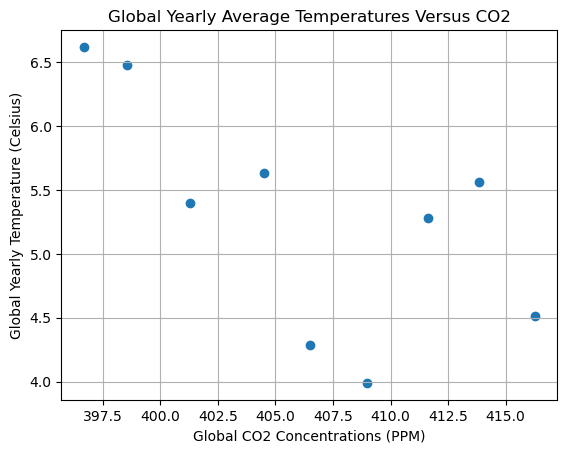

In [194]:
#scatterplot and correlation between co2 and global average temperature
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file as a DataFrame
df_yearly_final = pd.read_csv('merged_yearly.csv', parse_dates=[0])
#ignore the 2023 value
df_yearly_final = df_yearly_final.iloc[:-1, :]
# Create the scatter plot
plt.figure()
plt.scatter(df_yearly_final.iloc[:, 2], df_yearly_final.iloc[:, 4])
plt.ylabel('Global Yearly Temperature (Celsius)')
plt.xlabel('Global CO2 Concentrations (PPM)')
plt.title('Global Yearly Average Temperatures Versus CO2')
corr = df_yearly_final.iloc[:, 2].corr(df_yearly_final.iloc[:, 4])
print(f"Correlation: {corr:.2f}")
plt.grid(True)
plt.show()
